<class 'list'>
-0.033928871154785156
<class 'pandas.core.frame.DataFrame'>


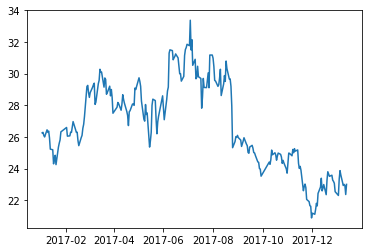

254


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pymysql.cursors
import time
import pymysql
import numpy as np


import tushare as ts
import matplotlib.pyplot as plt
import pandas as pd
import pymysql.cursors
import time
import pymysql
import numpy as np



def getstockdata(stockid, starttime, endtime):
    df = ts.get_hist_data(stockid, start=starttime, end=endtime)
    df = df.astype(str)
    # add the stockinfo to the stockdata
    df['stockid'] = stockid
    df['tradedate'] = df.index

    # create a dataframe to save the stockdata;must have the same index with df
    df_stockinfo = df[['stockid', 'tradedate']]

    # delete the stockinfo from stockhist
    df.drop(labels=['stockid', 'tradedate'], axis=1, inplace=True)
    # merge the stockinfo with stockdata and save in the df_stock
    df_stock = df_stockinfo.merge(df, right_index=True, left_index=True)
    return df_stock


# define function to convert the dataframe to list contains tuple
def convertdata(dfstock):
    list_row = dfstock.shape[0]
    # create  the list to transport values to mysql
    values = []
    for i in range(list_row):
        # chose every row and convert its type (series)   to list
        value = pd.np.array(dfstock.iloc[i])
        # convert list to tuple and add to the end of values
        tuple_value = tuple(value)
        values.append(tuple_value)
    return values

#define function to save data to mysql
def getdata():
    # Connect to the database

    connection = pymysql.connect(host='localhost',user='root',password='123456',db='analysis',charset='utf8mb4',cursorclass=pymysql.cursors.DictCursor)

    try:
        #with connection.cursor() as cursor:
    # Create a new record
            #sql = "INSERT INTO stocks_data('stockid'，'tradedate'，'open'，'high'，'close','low','volume','price_change','p_change','ma5','ma10','ma20','v_ma5','v_ma10','v_ma20','turnover') VALUES( %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
          #  sql = "INSERT INTO stocks_data(stockid,tradedate,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover) VALUES( %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"

           # cursor.executemany(sql, values)

        # connection is not autocommit by default. So you must commit to save
        # your changes.
           # connection.commit()  # commit changes to stable storage

        with connection.cursor() as cursor:
    # Read a single record
            sql = "SELECT * FROM `stocks_data` "
            cursor.execute(sql)
            result = cursor.fetchall()
    #    print(result)
            return result

    except Exception as e:
        # throw the exception
        print("error:")
        print(e)
        connection.rollback()  # Roll back the current transaction


    finally:
        cursor.close()
        connection.close()


def main():
    begintime = time.time()
    results=getdata()
    df=pd.DataFrame(results)
    #print(values)
    endtime = time.time()
    print(type(results))
    print(begintime - endtime)
    print(type(df))
    #Edf2=df.iloc[:,0]
    x=df['tradedate']
    y1=df['open']
    y2=df['close']
    plt.plot(x,y1)
    plt.show()
    print(df.shape[0])

main()


# get the stock data from tushare

000878
<class 'pandas.core.frame.DataFrame'>
the highestprice is 9.97
<class 'pandas.core.frame.DataFrame'>
-0.4200618267059326
<class 'pandas.core.frame.DataFrame'>
9.97
10.0


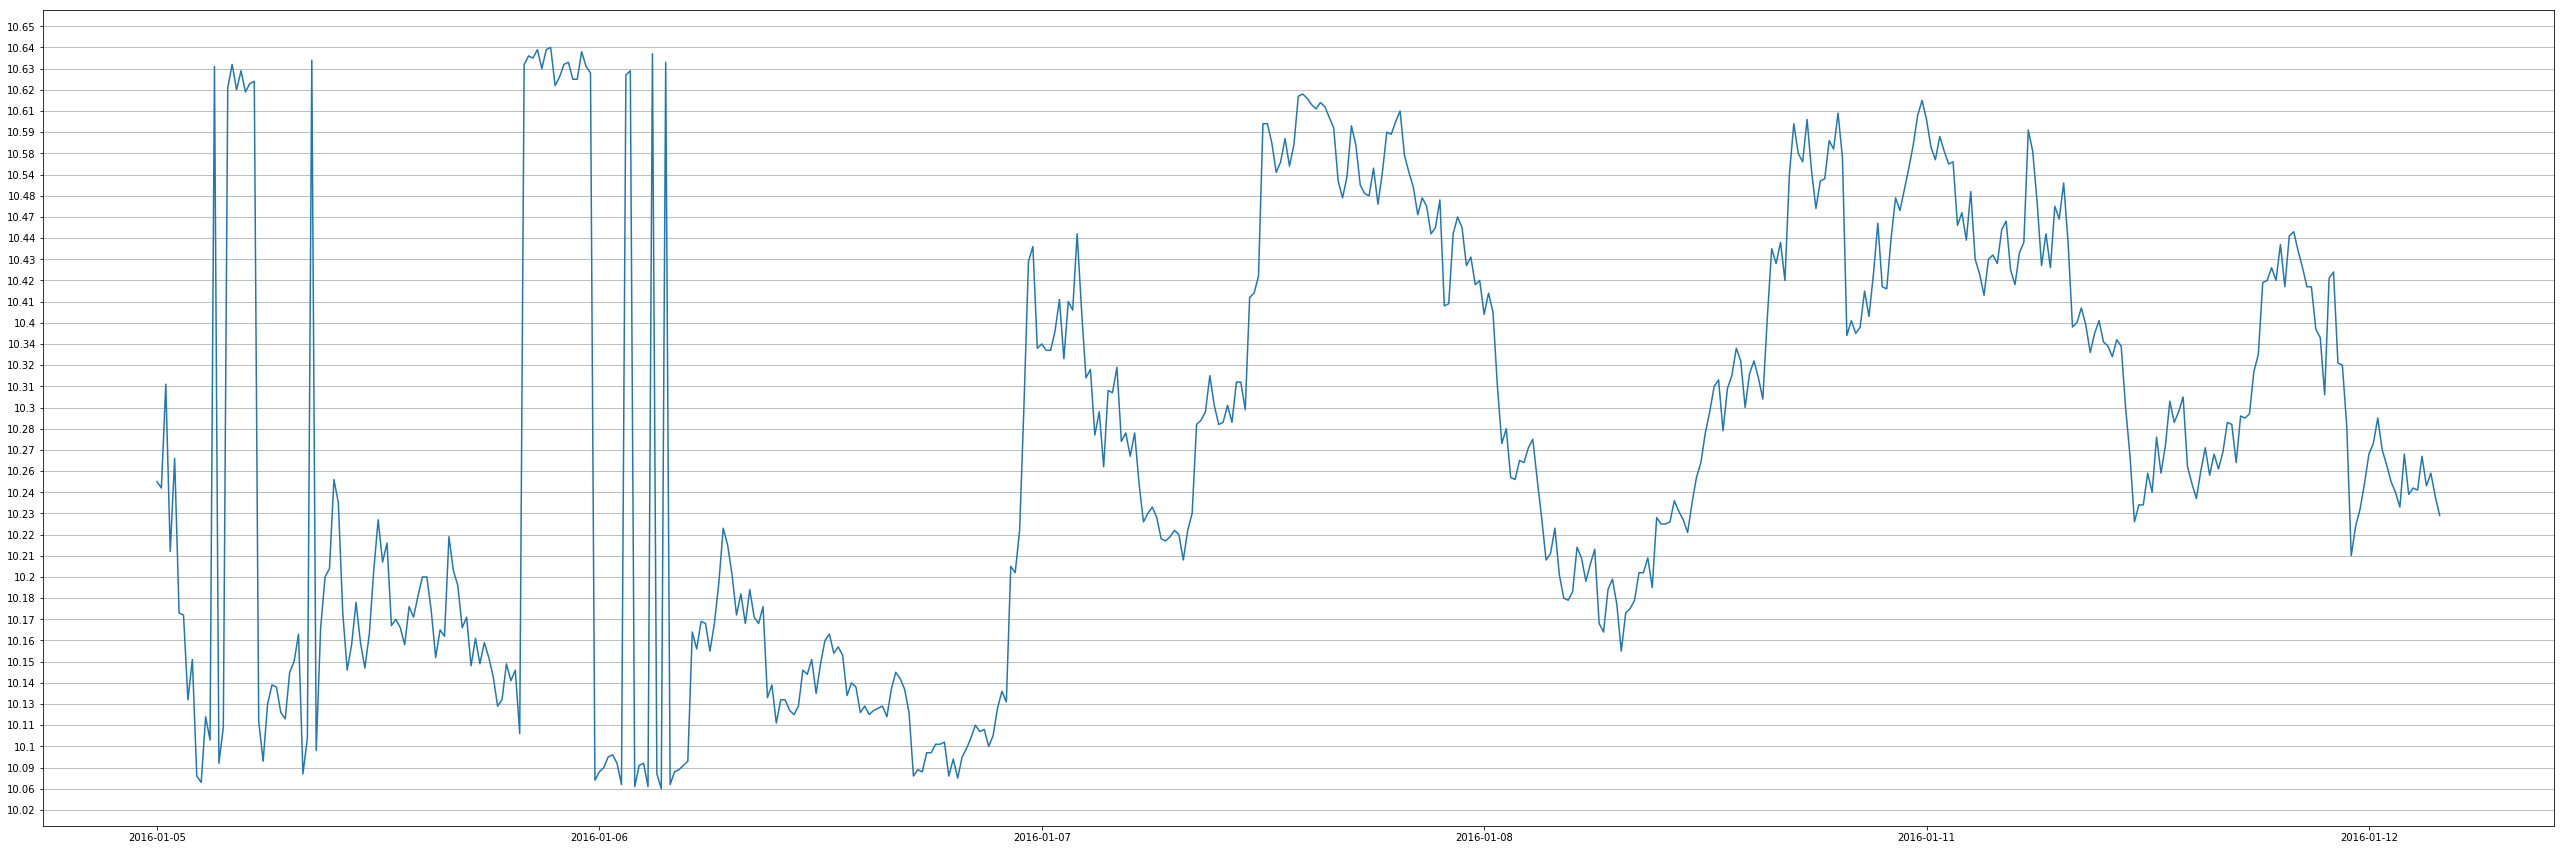

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import pymysql.cursors
import time
import pymysql
import numpy as np


import tushare as ts
import matplotlib.pyplot as plt
import pandas as pd
import pymysql.cursors
import time
import pymysql
import numpy as np

import matplotlib.ticker as mticker
import matplotlib.dates as mdates



def getstockdata(stockid, starttime, endtime):
    df = ts.get_hist_data(stockid, start=starttime, end=endtime)
    print(stockid)
    print(type(df))
    df = df.astype(str)
    # add the stockinfo to the stockdata
    df['stockid'] = stockid
    df['tradedate'] = df.index

    # create a dataframe to save the stockdata;must have the same index with df
    df_stockinfo = df[['stockid', 'tradedate']]

    # delete the stockinfo from stockhist
    df.drop(labels=['stockid', 'tradedate'], axis=1, inplace=True)
    # merge the stockinfo with stockdata and save in the df_stock
    df_stock = df_stockinfo.merge(df, right_index=True, left_index=True)
    return df_stock


def plotdata(x,y):
    fig=plt.figure(figsize=(45,15))
    ax1=fig.add_subplot(1,1,1)
    ax1.yaxis.set_major_locator(mticker.MultipleLocator(10)) #define the main axix value of y
#     ax1.yaxis.set_minor_locator(mticker.MultipleLocator(5))  #define the vice axix value of y
    ax1.yaxis.grid(True,which="major") # show the  vice axix grid
#     ax1.xaxis.set_major_locator(mdates.DayLocator()) #define the x value to be date
#     ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))# define the format of x value
    ax1.xaxis.set_major_locator(mticker.MultipleLocator(100))#设置x坐标刻度间距90天间隔
    ax1.plot(x,y)
    plt.show()
    
    
    

if __name__=="__main__":
    begintime = time.time()
    starttime='2016-01-01'
    endtime='2018-03-16'
    stockid='000878'
    results=getstockdata(stockid,starttime,endtime)
    df=pd.DataFrame(results)
    df=df.sort_values('tradedate',ascending=True)
    highestprice=max(df['high'])
    print("the highestprice is %s"%highestprice)
    #print(values)
    endtime = time.time()
    print(type(results))
    print(begintime - endtime)
    print(type(df))
    #Edf2=df.iloc[:,0]
    x=df['tradedate'].values
    y1=df['open']
    y2=df['close'].values
#     print(df.head(20))
    
    print(max(y1))
    print(min(y1))
 
    plotdata(x,y2)
    
 



In [50]:
# df.head(20)

##### 量化交易股票选子

In [10]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import statsmodels.api as sm
import scipy.stats as scs

In [ ]:
# 每月初所有因子
factors=['B/M','EPS','PEG','ROE','ROA','GP/R','P/R','L/A','FAP','CMV']
#月初取因子数值
def get_factors(fdate,factors):
    stock_set=get_idnex_stocks()

In [4]:
from sqlalchemy import Column, String, create_engine

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import pymysql.cursors
import time
import pymysql
import numpy as np
import json

def getdata(sqlInput,sqlType):
    # Connect to the database

    connection = pymysql.connect(host='localhost',user='root',password='123456',db='experiment',charset='utf8mb4',cursorclass=pymysql.cursors.DictCursor)
    sqlInput=sqlInput
    if sqlType=="input":

        try:

            with connection.cursor() as cursor:
                sql = sqlInput
                cursor.execute(sql)
                connection.commit()
                return "ok"
                
        except Exception as e:
            # throw the exception
            #print("error:")
            return(e)
            connection.rollback()  # Roll back the current transaction

        finally:
            cursor.close()
            connection.close()

    else:

        try:

            with connection.cursor() as cursor:
                sql = sqlInput
                cursor.execute(sql)
                result = cursor.fetchall()
                return result
                
        except Exception as e:
            # throw the exception
            #print("error:")
            return(e)
            connection.rollback()  # Roll back the current transaction

        finally:
            cursor.close()
            connection.close()
if __name__=="__main__":
    sql="select Pro_Id,Pro_Name  from ex_project where Pro_Type=1"
    get="get"
    data=getdata(sql,get) 
    reda=pd.DataFrame(data)
   # reda=pd.DataFrame(data).to_json(orient='split')
    reda_ProId=reda[['Pro_Id','Pro_Name']]
    reda_ProId2=reda_ProId[:].T.to_json(orient='split')
    
    #returndata=[reda_ProId,reda_ProName]
    #returndata2=json.dumps(returndata)
    
    
    print(reda_ProId2)

{"columns":[0,1,2,3,4,5,6,7,8,9,10,11,12,13],"index":["Pro_Id","Pro_Name"],"data":[[8,9,10,11,12,13,14,15,16,17,18,19,20,21],["test6","test6","test6","test8","test9","test10","test20180909"," \btest4444","z11611","6464654654"," \b848484test"," \b99999999test","None","dsfghj"]]}


In [47]:
# imsert ample data
import matplotlib.pyplot as plt
import pandas as pd
import pymysql.cursors
import time
import datetime
import pymysql
import numpy as np
import json
from operator import itemgetter
from itertools import groupby



#Python自带的json序列化工具不能序列化datetime类型数据问题 解决:datetime.datetime is not JSON serializable
class CJsonEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, datetime.datetime):
            return obj.strftime('%Y-%m-%d %H:%M:%S')
        elif isinstance(obj, datetime.date):
            return obj.strftime('%Y-%m-%d')
        else:
            return json.JSONEncoder.default(self, obj)


def getdata(sqlInput,sqlType):
    # Connect to the database

    connection = pymysql.connect(host='localhost',user='root',password='123456',db='experiment',charset='utf8mb4',cursorclass=pymysql.cursors.DictCursor)
    sqlInput=sqlInput
    if sqlType=="input":

        try:

            with connection.cursor() as cursor:
                sql = sqlInput
                cursor.execute(sql)
                connection.commit()
                return "ok"
                
        except Exception as e:
            # throw the exception
            #print("error:")
            return(e)
            connection.rollback()  # Roll back the current transaction

        finally:
            cursor.close()
            connection.close()

    else:

        try:

            with connection.cursor() as cursor:
                sql = sqlInput
                cursor.execute(sql)
                result = cursor.fetchall()
                return result
                
        except Exception as e:
            # throw the exception
            #print("error:")
            return(e)
            connection.rollback()  # Roll back the current transaction

        finally:
            cursor.close()
            connection.close()
if __name__=="__main__":
    projectid  = 1 #获取参数
    batchid  = 1
    batchname="fdg"
    sampledata="2345tyhdgffghgfd"
    userid=1
    datalength=5
    retype="getdata"
    retype2="getdata"
    
    searchkeyword="test6"
    #sql="insert into ex_sampledata(UserId,Pro_id,Batch_id,Batch_Name,Samp_Data,Samp_length) VALUES ('%d', '%d','%d','%s', '%s', '%d' )" %(userid,projectid,batchid,batchname,sampledata,datalength)
    #sqlinput="select Pro_Id,Pro_Name ,Pro_descrip,CreateTime   from ex_project   where Pro_Type=1 and UserId='%s'  and Pro_Name='%s'" %(userid,searchkeyword)
    #sqlinput2="select a.Pro_fatherId, b.Pro_Name as Pro_fatherName,a.Pro_Id as Batch_Id,a.Pro_Name as Batch_Name,a.Pro_descrip as Batch_Descrip ,a.CreateTime from ex_project a LEFT JOIN(select Pro_Id,Pro_Name  from ex_project) b \
    #on a.Pro_fatherId=b.Pro_Id AND a.Pro_Type=2 and a.UserId='%d' " %(userid)

    sqlinput="select Pro_Id,Pro_Name ,CreateTime   from ex_project  where Pro_Type=1 and UserId=%s" %(int(userid))
    sqlinput2="select a.Pro_fatherId, b.Pro_Name as Pro_fatherName,a.Pro_Id as Batch_Id,a.Pro_Name as Batch_Name,a.Pro_descrip as Batch_Descrip ,a.CreateTime from ex_project a LEFT JOIN(select Pro_Id,Pro_Name  from ex_project) b \
    on a.Pro_fatherId=b.Pro_Id AND a.Pro_Type=2 and a.UserId='%d' " %(int(userid))

    reda1=getdata(sqlinput,retype)
    reda2=getdata(sqlinput2,retype)
    for i in range(len(reda2)):
        reda2[i]['Pro_fatherId']=str(reda2[i]['Pro_fatherId'])
    reda2.sort(key=itemgetter('Pro_fatherId'))
    list1=[]
    batchdata={}
    for fatherid, items in groupby(reda2, key=itemgetter('Pro_fatherId')):
        fid=str(fatherid)
        for i in items:
            list1.append(i)
        batchdata[fid]=list1
        list1=[]
    retuerndata={"project":reda1,"batch":batchdata}
    retuerndata2=json.dumps(retuerndata,cls=CJsonEncoder)
    #reda_ProId2=json.dumps(reda2,cls=CJsonEncoder)
    #retuerndata=json.dumps(retuerndata2,cls=CJsonEncoder)
    #rsp = flask.Response(retuerndata)
    #rsp.headers = headers  

    print(retuerndata2[project)





AttributeError: 'str' object has no attribute 'project'

In [42]:
import json
a={'p':1,'b':4}
k=json.dumps(a )
print(type(k))

<class 'str'>


In [5]:
import tushare as ts
import matplotlib.pyplot as plt
import pandas  as pd
df=ts.get_hist_data('002142',start='2017-01-01',end='2018-01-01')
print(type(df))
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['open', 'high', 'close', 'low', 'volume', 'price_change', 'p_change',
       'ma5', 'ma10', 'ma20', 'v_ma5', 'v_ma10', 'v_ma20'],
      dtype='object')


In [6]:
df.head(5)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2017-12-29,17.77,17.95,17.81,17.70,123264.88,-0.02,-0.11,17.918,17.779,17.572,170530.10,191692.87,199016.35
2017-12-28,17.92,18.06,17.83,17.68,153046.33,-0.09,-0.50,17.918,17.709,17.562,172873.12,200829.49,207894.66
2017-12-27,18.13,18.29,17.92,17.70,175996.06,-0.23,-1.27,17.910,17.645,17.590,190561.24,201594.78,212738.46
2017-12-26,17.77,18.16,18.15,17.77,200417.31,0.27,1.51,17.856,17.573,17.618,196270.47,200804.64,215743.84
2017-12-25,17.81,18.20,17.88,17.70,199925.92,0.07,0.39,17.760,17.474,17.606,214465.35,194676.41,214748.56


In [7]:
def profile(buyprice,sellprice,num):
    return(num*(sellprice-buyprice))
profile(15.40,18.50,100)

309.99999999999994

In [17]:
# read data from yahoo  
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
start=datetime(2015,9,20)
alibaba=pdr.get_data_yahoo('BABA',start=start)
amazon=pdr.get_data_yahoo('AMZN',start=start)
baozun=pdr.get_data_yahoo('BZUN',start=start)

In [3]:
alibaba.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-09-21,66.400002,62.959999,65.379997,63.900002,22355100,63.900002
2015-09-22,63.270000,61.580002,62.939999,61.900002,14897900,61.900002
2015-09-23,62.299999,59.680000,61.959999,60.000000,22684600,60.000000
2015-09-24,60.340000,58.209999,59.419998,59.919998,20645700,59.919998
2015-09-25,60.840000,58.919998,60.630001,59.240002,17009100,59.240002


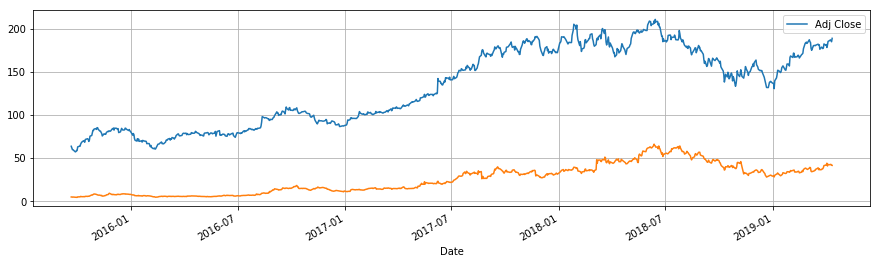

In [19]:
alibaba['Adj Close'].plot(legend=True,figsize=(15,4),grid=True)
baozun['Adj Close'].plot(grid=True)

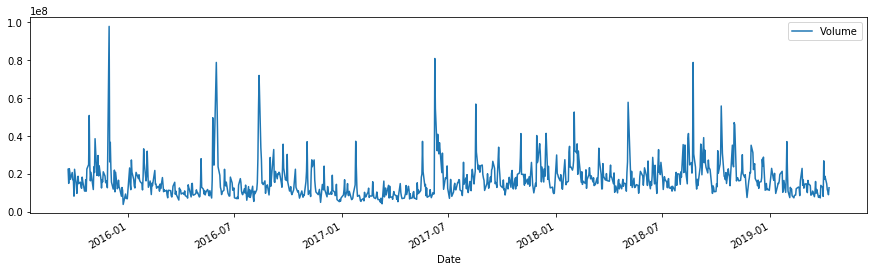

In [11]:
alibaba['Volume'].plot(legend=True,figsize=(15,4))

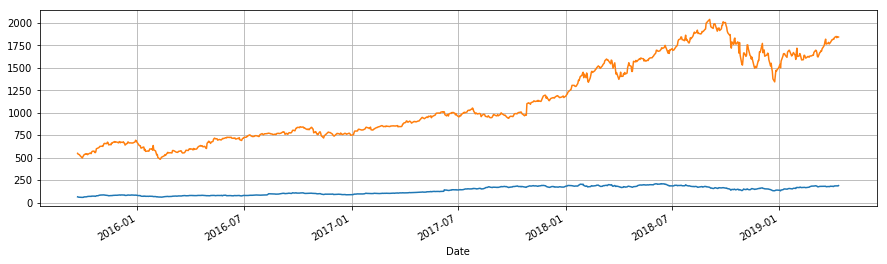

In [15]:
alibaba['Adj Close'].plot(figsize=(15,4))
amazon['Adj Close'].plot(figsize=(15,4),grid=True)

In [7]:
# the change trend
alibaba['high-low']=alibaba['High']-alibaba['Low']
alibaba.head()

,High,Low,Open,Close,Volume,Adj Close,high-low
Date,,,,,,,
2015-09-21,66.400002,62.959999,65.379997,63.900002,22355100,63.900002,3.440002
2015-09-22,63.270000,61.580002,62.939999,61.900002,14897900,61.900002,1.689999
2015-09-23,62.299999,59.680000,61.959999,60.000000,22684600,60.000000,2.619999
2015-09-24,60.340000,58.209999,59.419998,59.919998,20645700,59.919998,2.130001
2015-09-25,60.840000,58.919998,60.630001,59.240002,17009100,59.240002,1.920002


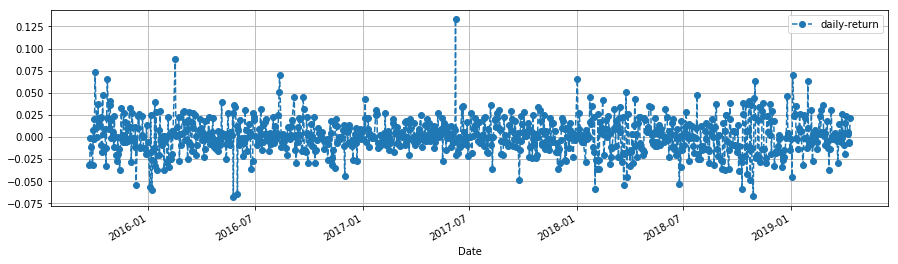

In [14]:
#daily return
alibaba['daily-return']=alibaba['Adj Close'].pct_change()
alibaba['daily-return'].plot(legend=True,figsize=(15,4),linestyle='--',marker='o',grid=True)

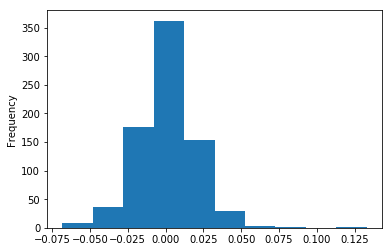

In [55]:
alibaba['daily-return'].plot(kind='hist')

/Users/four/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


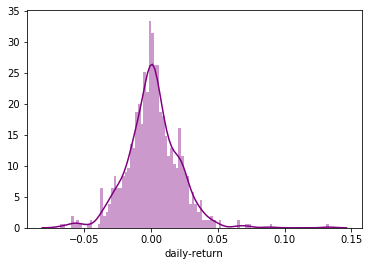

In [62]:
sns.distplot(alibaba['daily-return'].dropna(),bins=100,color='purple')

In [64]:
#市场分析
start=datetime(2015,1,1)
company=['AAPL','GOOG','MSFT','AMZN','FB']
top_tech_df=pdr.get_data_yahoo(company,start=start)['Adj Close']

In [66]:
top_tech_df.head()

Symbols,AAPL,AMZN,FB,GOOG,MSFT
Date,,,,,
2014-12-31,103.302063,310.350006,78.019997,523.521423,42.500294
2015-01-02,102.319397,308.519989,78.449997,521.937744,42.783936
2015-01-05,99.436890,302.190002,77.190002,511.057617,42.390499
2015-01-06,99.446251,295.290009,76.150002,499.212799,41.768314
2015-01-07,100.840714,298.420013,76.150002,498.357513,42.299000


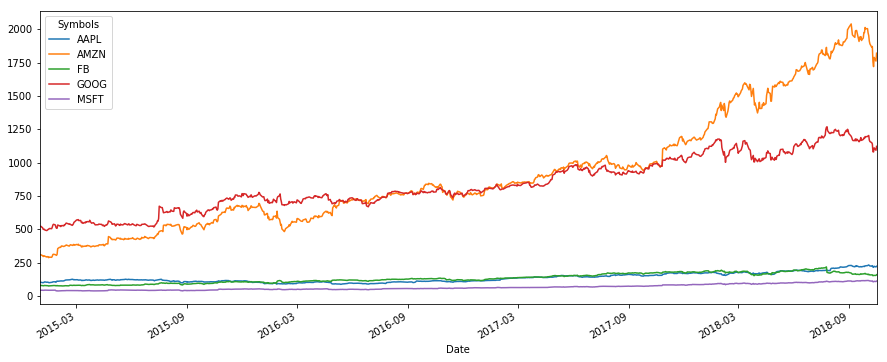

In [69]:
top_tech_df.plot(legend=True,figsize=(15,6))

In [70]:
#daily return
top_tech_dr=top_tech_df.pct_change()

In [71]:
top_tech_dr.head()

Symbols,AAPL,AMZN,FB,GOOG,MSFT
Date,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN
2015-01-02,-0.009513,-0.005897,0.005511,-0.003025,0.006674
2015-01-05,-0.028172,-0.020517,-0.016061,-0.020846,-0.009196
2015-01-06,0.000094,-0.022833,-0.013473,-0.023177,-0.014677
2015-01-07,0.014022,0.010600,0.000000,-0.001713,0.012705


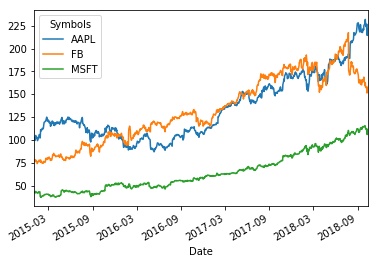

In [72]:
top_tech_df[['AAPL','FB','MSFT']].plot()

/Users/four/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


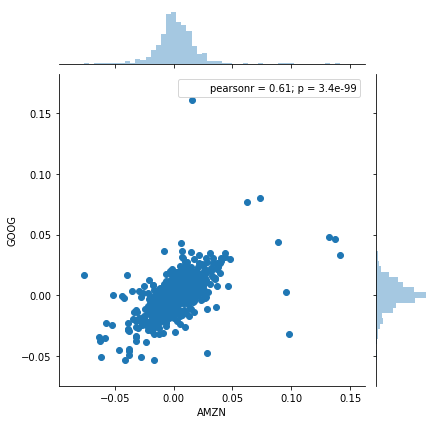

In [74]:
sns.jointplot('AMZN','GOOG',top_tech_dr,kind='scatter')

/Users/four/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


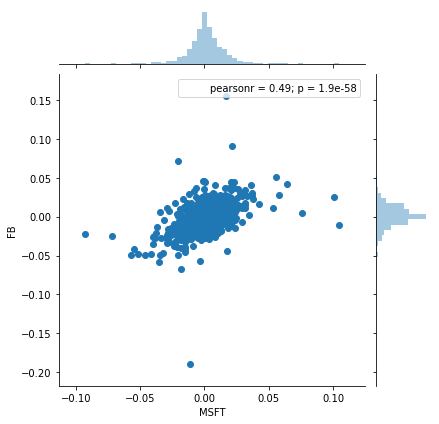

In [75]:
sns.jointplot('MSFT','FB',top_tech_dr,kind='scatter')

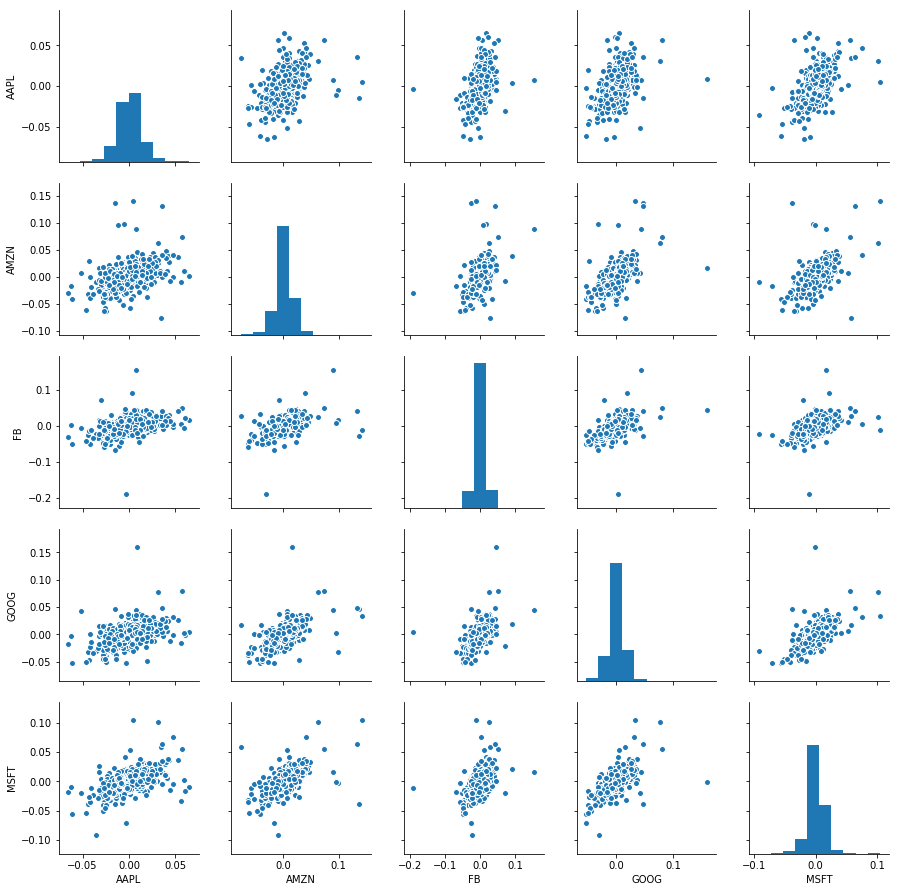

In [76]:
sns.pairplot(top_tech_dr.dropna())

In [77]:
#the risk
top_tech_dr['AAPL'].quantile(0.52)

0.0011127624981167906

In [79]:
top_tech_dr['MSFT'].quantile(0.05)

-0.020135277391494233

In [80]:
vips=pdr.get_data_yahoo('VIPS',start=start)['Adj Close']
vips.head()

Date
2014-12-31    19.540001
2015-01-02    20.500000
2015-01-05    21.620001
2015-01-06    21.750000
2015-01-07    22.160000
Name: Adj Close, dtype: float64

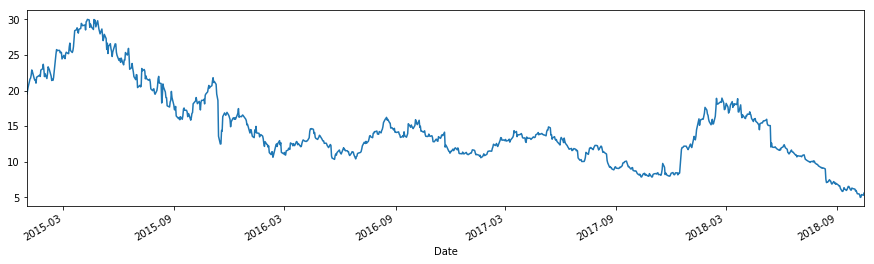

In [83]:
vips.plot(figsize=(15,4))

#  analysis  qiyi and baozun stocks

In [98]:
# get the data from yahoo
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
def getdata_yahoo(starttime,endtime,stockid):
    start=starttime
    end=endtime
    stock=stockid
    f=web.DataReader(stock,'yahoo',start,end)
    return f
start=datetime.datetime(2018,6,8)
end=datetime.datetime(2019,2,14)

f_qi=getdata_yahoo(start,end,'IQ')
f_baozun=getdata_yahoo(start,end,'BZUN')


In [99]:
#步骤一：归一化收盘价格，也就是求每天的收盘价格相对于初始第一天的价格的百分率。
for stockid in [f_qi,f_baozun]:
    stockid['normalized_price']=stockid['Adj Close']/stockid['Adj Close'].iloc[0]

In [100]:
#步骤二：资产分配： 50%，50%
for stockid,weight in zip([f_qi,f_baozun],[0.5,0.5]):
    stockid['weight daily return']=stockid['normalized_price']*weight

In [101]:
#步骤三：整合股票数据到一张表中
import pandas as pd
total_stock=pd.concat([f_qi['weight daily return'],f_baozun['weight daily return']],axis=1)
total_stock.columns=['qiyi','baozun']

In [102]:
#步骤四：投资计算
invest_money=5000
total_invest=total_stock*invest_money
total_invest.tail()

,qiyi,baozun
Date,,
2019-02-08,1671.798939,1372.802065
2019-02-11,1688.006456,1376.431688
2019-02-12,1722.042118,1394.579807
2019-02-13,1750.405196,1410.308125
2019-02-14,1782.009684,1403.653789


In [103]:
total_invest['Total Pos']=total_invest.sum(axis=1)
total_invest.tail(4)

,qiyi,baozun,Total Pos
Date,,,
2019-02-11,1688.006456,1376.431688,3064.438144
2019-02-12,1722.042118,1394.579807,3116.621925
2019-02-13,1750.405196,1410.308125,3160.713321
2019-02-14,1782.009684,1403.653789,3185.663473


,qiyi,baozun,Total Pos
Date,,,
2019-02-11,1688.006456,1376.431688,3064.438144
2019-02-12,1722.042118,1394.579807,3116.621925
2019-02-13,1750.405196,1410.308125,3160.713321
2019-02-14,1782.009684,1403.653789,3185.663473


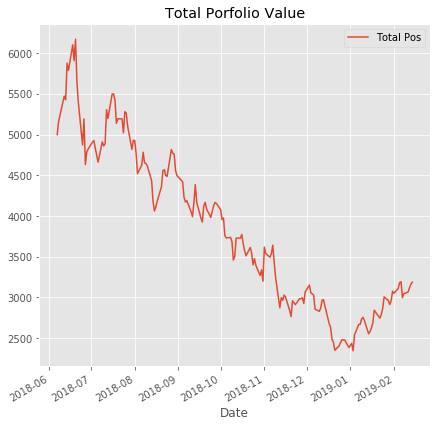

In [104]:
#绘制每天总收益率
plt.style.use('ggplot')
plt.figure(figsize=(7,7))
total_invest['Total Pos'].plot(label='Total Pos')
plt.legend(loc='best')
plt.title('Total Porfolio Value')
total_invest.tail(4)

In [105]:
#绘制一下除了总资产以外的其他单只股票的收益情况
#total_invest.drop(['Total Pos'],axis=1).plot(figsize=(8,4))
total_invest.tail(4)

,qiyi,baozun,Total Pos
Date,,,
2019-02-11,1688.006456,1376.431688,3064.438144
2019-02-12,1722.042118,1394.579807,3116.621925
2019-02-13,1750.405196,1410.308125,3160.713321
2019-02-14,1782.009684,1403.653789,3185.663473


In [106]:
#日回报率
total_invest['daily return']=total_invest['Total Pos'].pct_change(1)

#累积回报率-计算方法是最后一天与一开始第一天的变化百分比，相当于是增加了多少百分比
cumulative_return=total_invest['Total Pos'].iloc[-1]/total_invest['Total Pos'].iloc[0]-1

#平均日回报率-也就是对日回报率做平均计算
daily_reuturn_mean=total_invest['daily return'].mean()

#日回报率的标准差
daily_std=total_invest['daily return'].std()

print(cumulative_return)

-0.36286730533535516


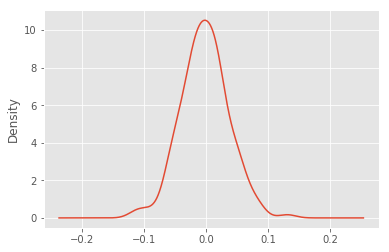

In [107]:
total_invest['daily return'].plot(kind='kde') ###?????

In [108]:
# 夏普比率
'''
也就是拿总资产日回报率的均值除以日回报率的标准差。
之后由于我们这里的粒度是以天算的，所以要乘以sqrt(252)，252代表252天
'''
SR=total_invest['daily return'].mean()/total_invest['daily return'].std()

import numpy as np
ASR=np.sqrt(252)*SR
ASR

-0.7827132600776091

In [2]:
import pandas as pd
df_qiyi=pd.read_excel('data/qiyistock.xlsx')

In [10]:
df_qiyi.tail(4)

,Date,High,Low,Open,Close,Volume,Adj Close,log_ret,volatility
217,2019-02-08,20.955000,19.400000,19.540001,20.629999,8653200,20.629999,0.031014,NaN
218,2019-02-11,21.700001,20.760000,21.020000,20.830000,8587800,20.830000,0.009648,NaN
219,2019-02-12,21.629999,21.084999,21.180000,21.250000,7444300,21.250000,0.019963,NaN
220,2019-02-13,22.030001,21.370001,21.559999,21.600000,7995100,21.600000,0.016336,NaN


In [15]:
df_qiyi.index=df_qiyi['Date']

In [21]:
# 计算波动率
import numpy as np
df_qiyi['log_ret']=np.log(df_qiyi['Close']/df_qiyi['Close'].shift(1))
df_qiyi['volatility']=(df_qiyi['log_ret'].rolling(window=20).std())*np.sqrt(30)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11eea8828>,
      dtype=object)

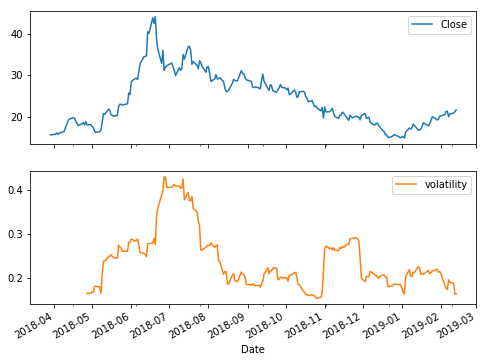

In [22]:
%matplotlib inline

df_qiyi[['Close','volatility']].plot(subplots=True,figsize=(8,6))

In [18]:
df_qiyi.head(4)

,Date,High,Low,Open,Close,Volume,Adj Close,log_ret,volatility
Date,,,,,,,,,
2018-03-29,2018-03-29,18.50,15.44,18.200001,15.55,79752900,15.55,NaN,NaN
2018-04-02,2018-04-02,16.48,15.62,16.190001,15.70,15287800,15.70,0.009600,NaN
2018-04-03,2018-04-03,16.50,15.90,16.350000,16.00,7994100,16.00,0.018928,NaN
2018-04-04,2018-04-04,15.80,15.30,15.360000,15.67,9866600,15.67,-0.020841,NaN


In [26]:
import numpy as np
import matplotlib.pyplot as plt


a=[1,4,5,8,15]
b=[2*x for x in a ]
a_=np.mean(a)
b_=np.mean(b)
number=len(a)
E_a=a-a_
E_b=b-b_

#plt.plot(a,b)
#plt.show()
sum(E_a*E_b)/number

#coefficient



45.279999999999994